In this project, we analyzed the exchange rates of five (original) BRICS currencies (Brazilian Real, Russian Ruble, Indian Rupee, Chinese Yuan, and South African Rand) against the US Dollar from 2020 to 2023. We used the yfinance library to download the daily closing prices and computed the daily returns to analyze volatility and trends. We examined correlations between the currencies and visualized the data, including rolling averages and volatility. Additionally, we calculated the Sharpe ratio to assess risk-adjusted returns and simulated currency portfolios to evaluate their overall return and volatility.

In [1]:
#!pip install yfinance
## If not already installed

import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Define ticker symbols for BRICS currencies
currencies = ['BRLUSD=X', 'RUBUSD=X', 'INRUSD=X', 'CNYUSD=X', 'ZARUSD=X']

# Download the data for all currencies
data = yf.download(currencies, start='2020-01-01', end='2023-01-01', interval='1d')

# Keep only the 'Close' prices
close_prices = data['Close']

# Display the first few rows of the data
print(close_prices.head(10))

# Save the data to a CSV file for later use
close_prices.to_csv('brics_currencies_to_usd.csv')

[*********************100%***********************]  5 of 5 completed
            BRLUSD=X  CNYUSD=X  INRUSD=X  RUBUSD=X  ZARUSD=X
Date                                                        
2020-01-01  0.248955  0.143631  0.014030  0.016122  0.071449
2020-01-02  0.248985  0.143633  0.014080  0.016173  0.071414
2020-01-03  0.248546  0.143608  0.014003  0.016209  0.071033
2020-01-06  0.246488  0.143585  0.013941  0.016121  0.069841
2020-01-07  0.246281  0.143379  0.013930  0.016188  0.070409
2020-01-08  0.245930  0.144001  0.013858  0.016147  0.069661
2020-01-09  0.246136  0.143984  0.014003  0.016323  0.070639
2020-01-10  0.244373  0.143850  0.014046  0.016322  0.070359
2020-01-13  0.245670  0.144732  0.014094  0.016392  0.069783
2020-01-14  0.241208  0.145081  0.014140  0.016343  0.069549


Ticker Symbol Explanation: 

CUR1CUR2=X, where CUR1 is the base currency and CUR2 is the quote currency.

Eg BRLUSD=X: Exchange rate of 1 Brazilian Real (BRL) in terms of USD.

In [3]:
# Check for Missing values
close_prices.isnull().sum()

BRLUSD=X    0
CNYUSD=X    0
INRUSD=X    0
RUBUSD=X    0
ZARUSD=X    0
dtype: int64

In [4]:
# Basic Statistics: Get an overview of exchange rate ranges, averages, and variations.
close_prices.describe()

,BRLUSD=X,CNYUSD=X,INRUSD=X,RUBUSD=X,ZARUSD=X
count,783.000000,783.000000,783.000000,783.000000,783.000000
mean,0.191962,0.149644,0.013250,0.014095,0.063496
std,0.014163,0.006154,0.000482,0.001667,0.005020
min,0.169883,0.136915,0.012049,0.007196,0.051952
25%,0.183326,0.143573,0.013077,0.013323,0.059045
50%,0.189656,0.150376,0.013370,0.013631,0.064411
75%,0.195410,0.154887,0.013573,0.015194,0.067634
max,0.248985,0.158519,0.014141,0.019060,0.074527


count: The number of non-missing data points in the dataset for each currency pair.

mean: The average exchange rate over the observed period.

std (Standard Deviation): A measure of the volatility or spread of the exchange rates.

25% (25th Percentile or Q1): The exchange rate at which 25% of the data lies below this value.

50% (Median or Q2): The middle value of the exchange rates when ordered.

75% (75th Percentile or Q3):The exchange rate at which 75% of the data lies below this value.

max: The highest exchange rate observed during the period.

In [5]:
# Calculate Returns
# Analyze percentage changes 

# Return_t = 100 * (Close_t - Close_(t-1))/Close_(t-1)

returns = close_prices.pct_change() * 100
print(returns.head(10))

            BRLUSD=X  CNYUSD=X  INRUSD=X  RUBUSD=X  ZARUSD=X
Date                                                        
2020-01-01       NaN       NaN       NaN       NaN       NaN
2020-01-02  0.012097  0.001432  0.353119  0.320718 -0.050137
2020-01-03 -0.176454 -0.017232 -0.546105  0.220131 -0.533314
2020-01-06 -0.828207 -0.015793 -0.440538 -0.541350 -1.677924
2020-01-07 -0.083735 -0.143381 -0.078008  0.412778  0.813579
2020-01-08 -0.142634  0.433443 -0.516910 -0.251727 -1.062332
2020-01-09  0.083682 -0.011517  1.047586  1.092022  1.403661
2020-01-10 -0.716018 -0.093505  0.305649 -0.006847 -0.396888
2020-01-13  0.530653  0.613668  0.340078  0.427996 -0.818203
2020-01-14 -1.816301  0.240836  0.331035 -0.299076 -0.335572


Why Calculate Returns?

Normalize Values: Exchange rates vary widely (e.g., CNYUSD=X is much smaller in value than BRLUSD=X), but percentage changes standardize the analysis.

Trend Insights: Identify uptrends, downtrends, or periods of stability.

Risk Analysis: Returns help measure volatility, which is critical for risk assessment.

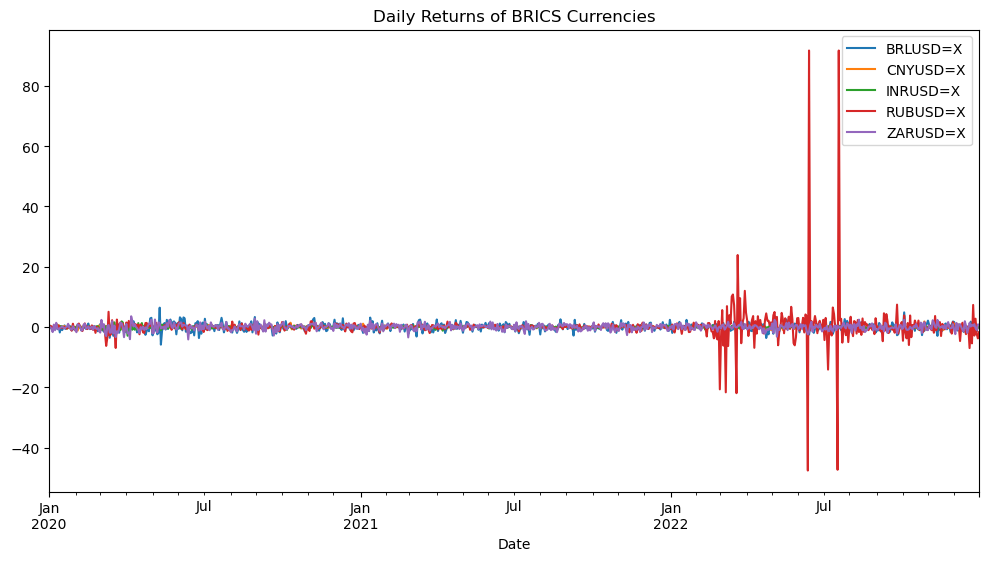

In [6]:
# Visualization

returns.plot(figsize=(12, 6), title='Daily Returns of BRICS Currencies')
plt.show()

The graph highlights the daily returns of BRICS currencies against the USD over time. Among the five currencies, the Russian Ruble (RUB) exhibits significantly higher volatility, particularly during specific periods. This elevated volatility can often be attributed to geopolitical events, which tend to create uncertainty in financial markets. Such events can disrupt trade flows, lead to policy interventions, or influence investor sentiment, thereby amplifying fluctuations in exchange rates. In contrast, other BRICS currencies, such as the Chinese Yuan (CNY) and Indian Rupee (INR), demonstrate relatively stable trends, suggesting lesser exposure to similar external shocks during the same timeframe.

In [7]:
# Correlation Analysis

correlation_matrix = returns.corr()
print(correlation_matrix)

          BRLUSD=X  CNYUSD=X  INRUSD=X  RUBUSD=X  ZARUSD=X
BRLUSD=X  1.000000  0.153358  0.272929 -0.000438  0.429402
CNYUSD=X  0.153358  1.000000  0.206742  0.007288  0.252574
INRUSD=X  0.272929  0.206742  1.000000  0.046435  0.353598
RUBUSD=X -0.000438  0.007288  0.046435  1.000000  0.034949
ZARUSD=X  0.429402  0.252574  0.353598  0.034949  1.000000


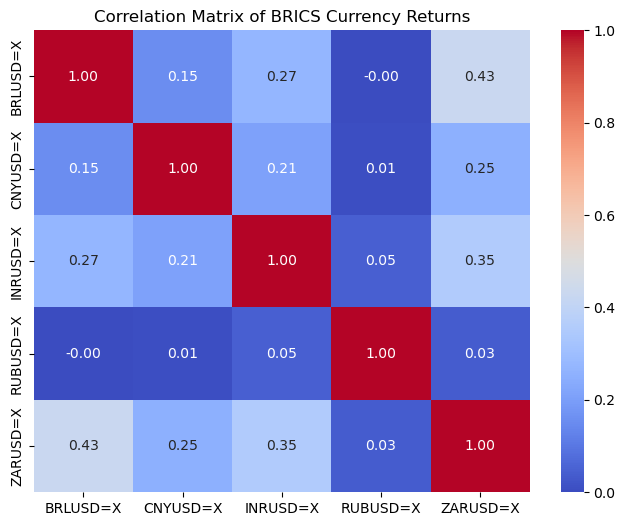

In [8]:
# Visualize the correlation
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of BRICS Currency Returns')
plt.show()

The Brazilian Real (BRL) and South African Rand (ZAR) show a moderate positive correlation. This could indicate that these two currencies might react similarly to global market trends, such as changes in commodity prices or investor sentiment toward emerging markets.

The Russian Ruble (RUB) has very low correlation with all other currencies (near 0 or slightly negative). This suggests that RUB's movements are driven by unique factors, possibly related to Russia-specific economic or geopolitical events, rather than shared global influences.

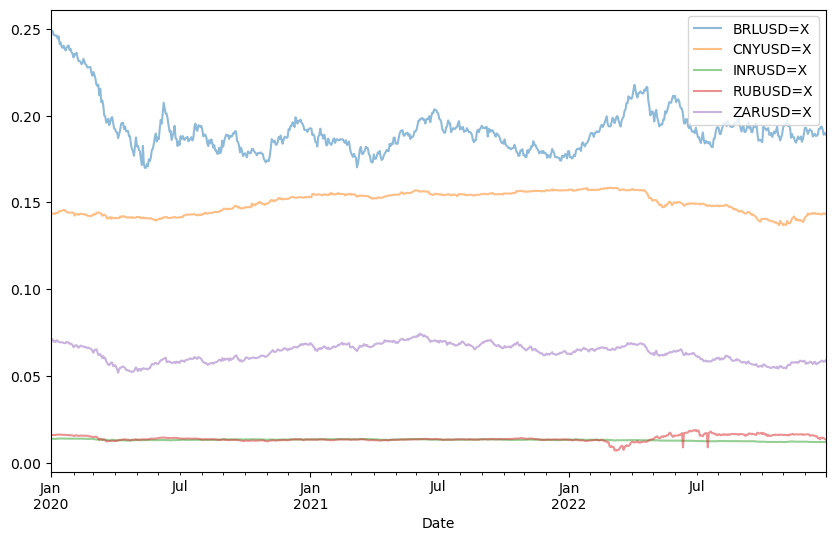

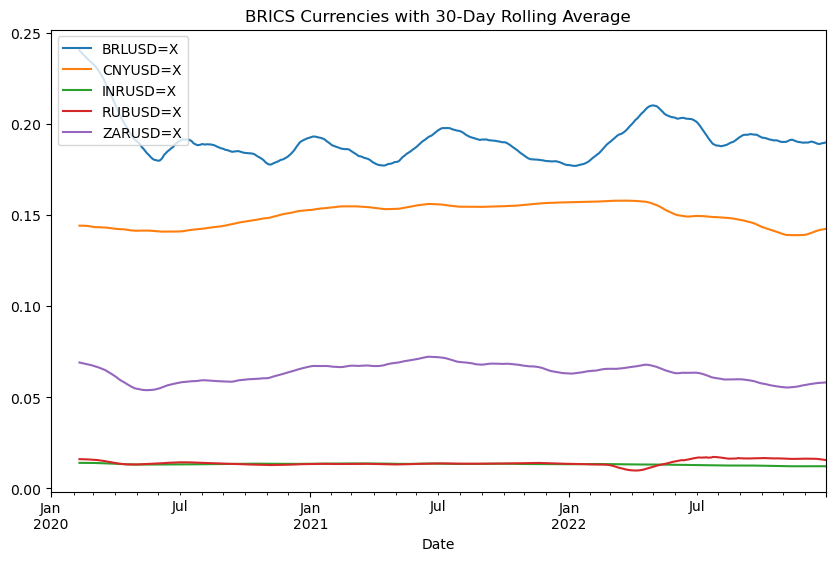

In [9]:
# Use rolling averages to smooth out short-term fluctuations and highlight long-term trends.

rolling_avg = close_prices.rolling(window=30).mean()  # 30-day rolling mean

close_prices.plot(figsize=(10, 6), label='Original Data', alpha=0.5)
rolling_avg.plot(figsize=(10, 6), label="30-Day Rolling Average")

plt.legend()
plt.title('BRICS Currencies with 30-Day Rolling Average')
plt.show()

The raw data often contains noise due to short-term volatility. The rolling average filters out this noise to highlight the underlying trend.

It helps identify whether a currency is generally appreciating or depreciating over a period without being distracted by minor daily movements.


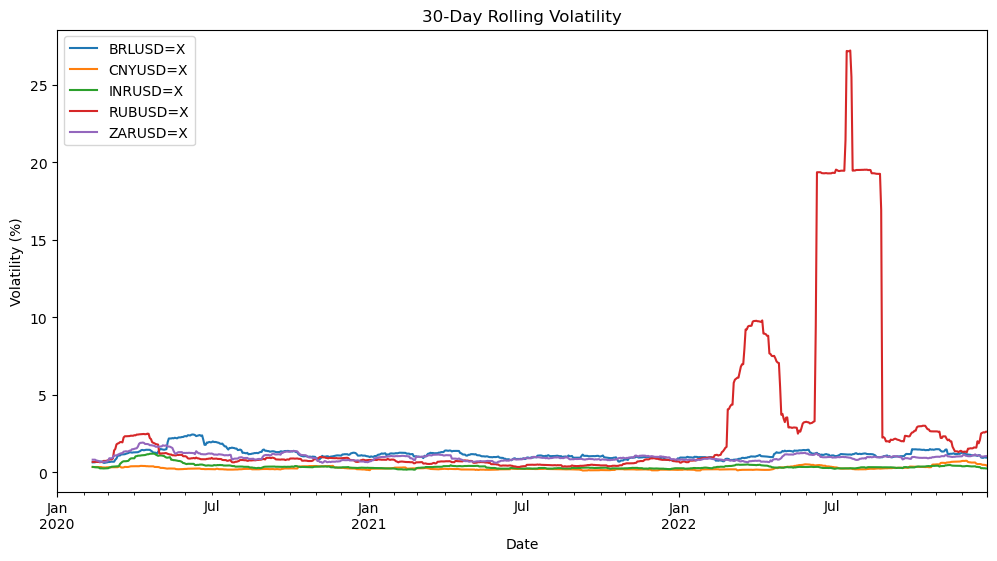

In [10]:
# Volatility Analysis: Use standard deviation of returns to measure volatility.

volatility = returns.rolling(window=30).std()
volatility.plot(figsize=(12, 6), title='30-Day Rolling Volatility')
plt.ylabel('Volatility (%)')
plt.show()

RUB (Russian Ruble) shows significantly higher volatility compared to other currencies, with major spikes observed. These spikes indicate periods of extreme price fluctuations, likely driven by external events or market uncertainties.

#  Risk and Portfolio Implications


The Sharpe Ratio measures the risk-adjusted return of an asset (or currency in this case). It compares the average return of the asset to its volatility (standard deviation).

Positive Sharpe Ratio: Occurs when average returns are positive and outweigh the impact of volatility.

Negative Sharpe Ratio: Occurs when the average returns are negative, regardless of volatility. This implies that the currency is losing value over the period studied.


In [11]:
# Sharpe Ratio: Compute risk-adjusted returns for each currency.
avg_returns = returns.mean()
volatility = returns.std()
sharpe_ratio = avg_returns / volatility    # risk-free rate is considered 0
print(sharpe_ratio)


BRLUSD=X   -0.023164
CNYUSD=X    0.001423
INRUSD=X   -0.045239
RUBUSD=X    0.020811
ZARUSD=X   -0.019089
dtype: float64


In [12]:
# Simulate a Currency Portfolio:

# This code calculates the expected return and volatility of a currency portfolio using the average returns,
# covariance matrix, and portfolio weights.


weights = [0.2, 0.2, 0.2, 0.2, 0.2]
# This assumes the portfolio is equally distributed among the five currencies

portfolio_returns = (returns.mean() @ weights)
portfolio_volatility = np.sqrt(weights @ returns.cov() @ weights)
print(f"Portfolio Returns: {portfolio_returns}, Portfolio Volatility: {portfolio_volatility}")


Portfolio Returns: 0.01104830068543905, Portfolio Volatility: 1.243419555794123


Conclusion: The portfolio shows a positive return of 1.10% over the evaluation period.
This suggests that, on average, the selected BRICS currencies (BRL, CNY, INR, RUB, ZAR) collectively outperformed the USD during the evaluation period.

The portfolio's volatility is 1.243 (124.3%), which is relatively high.
This indicates that the portfolio carries significant risk, with large fluctuations in returns possible.

In [13]:
sharpe_ratio = portfolio_returns / portfolio_volatility
print(f"Sharpe Ratio: {sharpe_ratio}")
# Risk-free rate is assumed to be zero. One may incorporate a non-zero risk-free rate.

Sharpe Ratio: 0.00888541653857369


In [14]:
# Previously, the portfolio assumed equal weights (0.2 for each asset); now, we generate random weights, 
# normalize them so they sum to 1, and use these to calculate portfolio returns and volatility.

weights = np.random.random(5)  # Random weights, each between 0 and 1
weights /= np.sum(weights)     # Normalize to ensure weights sum to 1
print(weights)
portfolio_returns = (returns.mean() @ weights)
portfolio_volatility = np.sqrt(weights @ returns.cov() @ weights)
print(f"Portfolio Returns: {portfolio_returns}, Portfolio Volatility: {portfolio_volatility}")

# Note: This block of code will produce different outputs for each run.

[0.35838652 0.36841294 0.18819211 0.05130215 0.03370628]
Portfolio Returns: -0.00776638481543448, Portfolio Volatility: 0.589640915659994


In [15]:
# Visualize Risk-Return Tradeoff: We can plot the risk-return tradeoff for multiple weight combinations:

results = []
for _ in range(1000):  # Simulate 1000 portfolios
    weights = np.random.random(5)
    weights /= np.sum(weights)
    port_ret = (returns.mean() @ weights)
    port_vol = np.sqrt(weights @ returns.cov() @ weights)
    sharpe_ratio = port_ret / port_vol
    results.append((weights, port_ret, port_vol, sharpe_ratio))

In [16]:
best_portfolio = max(results, key=lambda x: x[3])  # Sharpe Ratio is at index 3
best_weights, best_ret, best_vol, best_sharpe = best_portfolio
print(f"Best Weights: {best_weights}")
print(f"Best Sharpe Ratio: {best_sharpe}, Return: {best_ret}, Volatility: {best_vol}")

Best Weights: [0.00810305 0.29430992 0.19633401 0.49147512 0.0097779 ]
Best Sharpe Ratio: 0.019383728757219904, Return: 0.05520792020278195, Volatility: 2.8481579005906448


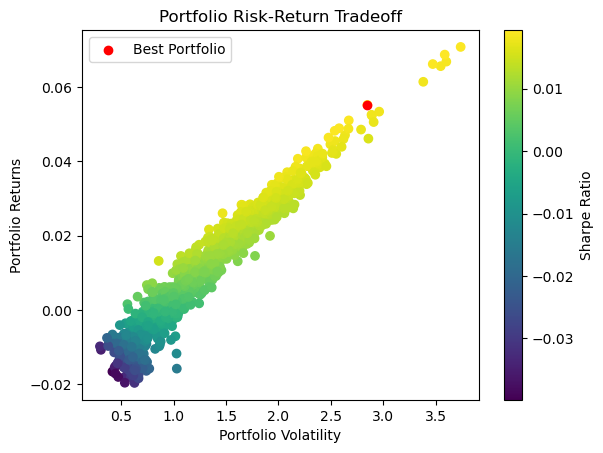

In [17]:
# Convert results to a NumPy array with proper structure
results_array = np.array([(r[0], r[1], r[2], r[3]) for r in results], dtype=object)

# Extract portfolio metrics for plotting
volatility = np.array([r[2] for r in results])  # Portfolio volatility
returns = np.array([r[1] for r in results])  # Portfolio returns
sharpe_ratios = np.array([r[3] for r in results])  # Sharpe ratios

# Plot the risk-return tradeoff
plt.scatter(volatility, returns, c=sharpe_ratios, cmap='viridis')  # Volatility vs Return
plt.colorbar(label='Sharpe Ratio')
plt.scatter(best_vol, best_ret, color='red', label='Best Portfolio')  # Highlight the best portfolio
plt.xlabel('Portfolio Volatility')
plt.ylabel('Portfolio Returns')
plt.title('Portfolio Risk-Return Tradeoff')
plt.legend()
plt.show()